In [25]:
!pip install requests
from requests import post, get
!pip install tensorflow
from tensorflow import feature_column
from tensorflow.keras import layers

twisted 18.7.0 requires PyHamcrest>=1.9.0, which is not installed.
tensorboard 2.0.0 has requirement setuptools>=41.0.0, but you'll have setuptools 40.2.0 which is incompatible.
You are using pip version 10.0.1, however version 19.2.3 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


  Using cached https://files.pythonhosted.org/packages/54/5f/e1b2d83b808f978f51b7ce109315154da3a3d4151aa59686002681f2e109/tensorflow-2.0.0-cp37-cp37m-win_amd64.whl
  Using cached https://files.pythonhosted.org/packages/d0/33/376510eb8d6246f3c30545f416b2263eee461e40940c2a4413c711bdf62d/google_pasta-0.1.7-py3-none-any.whl
  Found existing installation: wrapt 1.10.11


twisted 18.7.0 requires PyHamcrest>=1.9.0, which is not installed.
tensorboard 2.0.0 has requirement setuptools>=41.0.0, but you'll have setuptools 40.2.0 which is incompatible.
Cannot uninstall 'wrapt'. It is a distutils installed project and thus we cannot accurately determine which files belong to it which would lead to only a partial uninstall.
You are using pip version 10.0.1, however version 19.2.3 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


ModuleNotFoundError: No module named 'tensorflow'

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.cluster import KMeans , DBSCAN , AgglomerativeClustering
import tensorflow as tf
from tensorflow import feature_column
from tensorflow.keras import layers

ModuleNotFoundError: No module named 'tensorflow'

In [4]:
def create_dataset_01():
    Centers = [
        (0,0),
        (1,1),
        (2,1),
        (1,3)
    ]
    Centers = np.array(Centers)
    Points = []
    for center in Centers:
        var = np.array([[1,.5], [0,2]])
        Points.append(
            np.random.multivariate_normal(
                center,
                0.05*var,
                100
            )
        )
    Points = np.vstack(Points)
    return Points

In [5]:
np.random.seed(100)
Points = create_dataset_01()

C:\Users\krish\Anaconda\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning: covariance is not positive-semidefinite.
  app.launch_new_instance()


In [ ]:
plt.scatter(Points[:,0], Points[:,1])
plt.title("Data_set_01")
plt.show()

So, it appears that Data_set_01 has 4 clusters

In [11]:
from random import random
def create_dataset_02():
    def line0(x):
        return (x, 10 - x**2 + (random() - 0.5))
    Points = []
    for _ in range(1000):
        x = 5*(random() - 0.5)
        point = line0(x)
        Points.append(point)
        
    def line1(x):
        return (x, 5*random() +((x)*(x-8)) + 5 )
    
    for _ in range(1000):
        x = 5*(random()+.1)
        point = line1(x)
        Points.append(point)
    
    Points = np.array(Points)
    return np.vstack(
        [
            Points, 
            np.random.multivariate_normal((5,5), [[1,0],[0,1]],100)
        ])

In [12]:
X = create_dataset_02()

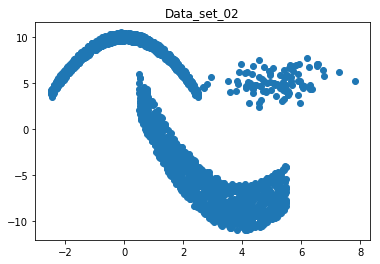

In [13]:
plt.scatter(X[:,0], X[:,1])
plt.title("Data_set_02")
plt.show()

So, it appears that Data_set_02 has 3 plots.

A) KMeans Clustering

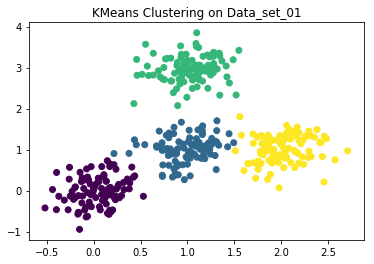

In [14]:
#KMeans Clustering on Data_set_01
kmeans_model = KMeans(n_clusters = 4)
y_pred_kmeans_1 = kmeans_model.fit_predict(Points)

plt.scatter(Points[:, 0], Points[:, 1], c = y_pred_kmeans_1)
plt.title("KMeans Clustering on Data_set_01")
plt.show()

Kmeans clustering quantified 4 clusters for Data_set_01

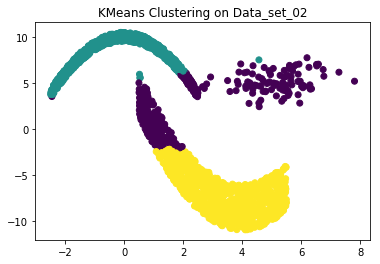

In [15]:
# KMeans Clustering on Data_set_02
kmeans_model = KMeans(n_clusters = 3)
y_pred = kmeans_model.fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c = y_pred)
plt.title("KMeans Clustering on Data_set_02")
plt.show()

DBScan Clustering

In [16]:
# DBScan Clustering on Data_set_01
db = DBSCAN(eps = 0.308, min_samples = 20).fit(Points)

core_samples_mask = np.zeros_like(db.labels_, dtype = bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)

Estimated number of clusters: 4
Estimated number of noise points: 24


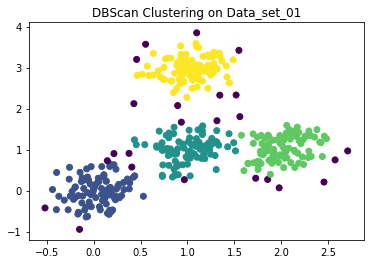

In [17]:
plt.scatter(Points[:, 0], Points[:, 1], c = db.labels_)
plt.title("DBScan Clustering on Data_set_01")
plt.show()

DBScan clustering does not quantify 4 clusters as good as KMeans

In [18]:
# DBScan Clustering on Data_set_02
db = DBSCAN(eps = .9, min_samples = 20).fit(X)

core_samples_mask = np.zeros_like(db.labels_, dtype = bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)

Estimated number of clusters: 3
Estimated number of noise points: 26


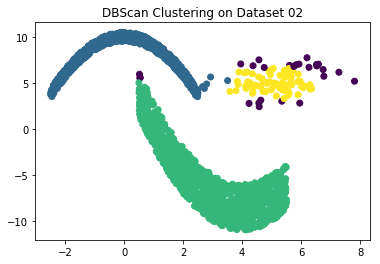

In [19]:
plt.scatter(X[:, 0], X[:, 1], c = db.labels_)
plt.title("DBScan Clustering on Dataset 02")
plt.show()

Here it quantifies the 3 clusters better than KMeans with a few scattered points here and there

Agglomerative Clustering

In [20]:
# Agglomerative Clustering on Data_set_01
model1 = AgglomerativeClustering(n_clusters = 4).fit(Points)

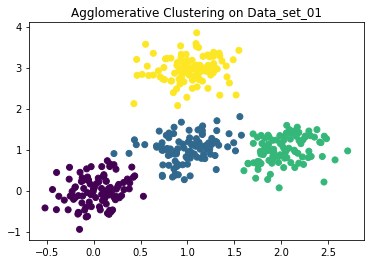

In [21]:
plt.scatter(Points[:, 0], Points[:, 1], c = model1.labels_)
plt.title("Agglomerative Clustering on Data_set_01")
plt.show()

This clustering of data set 1 appears same as KMeans

In [22]:
# Agglomerative Clustering on Data_set_02
model = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward').fit(X)

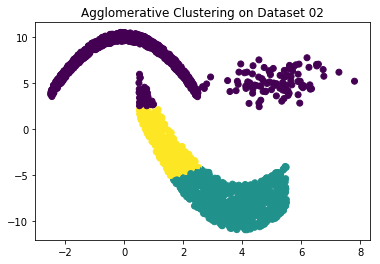

In [23]:
plt.scatter(X[:, 0], X[:, 1], c = model.labels_)
plt.title("Agglomerative Clustering on Dataset 02")
plt.show()

The clustering is similar to KMeans for dataset 2 as well!

Training a Tensorflow Classifier to take a point and and classify as one of the clusters from KMeans

In [24]:
# Data_set_01
tf_model = tf.keras.Sequential([tf.keras.Input(shape = (2, ), name = 'digits'), 
                                layers.Dense(10, activation = 'relu'), 
                                layers.Dense(4, activation = 'softmax', name = 'predictions')
                               ])

tf_model.compile(optimizer = 'adam', 
                 loss = tf.keras.losses.SparseCategoricalCrossentropy(), 
                 metrics = ['accuracy'], 
                 run_eagerly = True)

tf_model.fit(Points, y_pred_kmeans_1, epochs = 100)

NameError: name 'tf' is not defined

In [26]:
# Taking a point from Dataset 01 to classify
Points_test = create_dataset_01()[:1]
pred = tf_model.predict_classes(Points_test)

C:\Users\krish\Anaconda\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning: covariance is not positive-semidefinite.
  app.launch_new_instance()


NameError: name 'tf_model' is not defined

NameError: name 'pred' is not defined

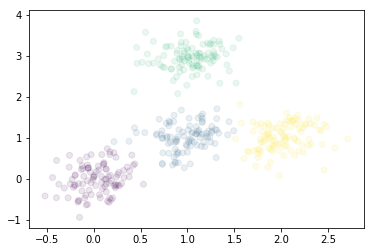

In [27]:
plt.scatter(Points[:, 0], Points[:, 1], c = y_pred_kmeans_1, alpha = 0.1)
plt.scatter(Points_test[:, 0], Points_test[:, 1], c = pred, marker = 'x', s = 1000)
plt.title('Cluster classification using Tensorflow for Dataset01')
plt.show()

In [28]:
# Dataset 02
tf_model2 = tf.keras.Sequential([tf.keras.Input(shape = (2, ), name = 'digits'), 
                                layers.Dense(10, activation = 'sigmoid'), 
                                layers.Dense(3, activation = 'softmax', name = 'predictions')
                                ])

tf_model2.compile(optimizer = 'adam', 
                 loss = tf.keras.losses.SparseCategoricalCrossentropy(), 
                 metrics = ['accuracy'], 
                 run_eagerly = True)

tf_model2.fit(X, y_pred, epochs = 100)

NameError: name 'tf' is not defined

In [29]:
# Taking a point from Dataset 02 to classify
X_test = create_dataset_02()[:1]
pred2 = tf_model2.predict_classes(X_test)

NameError: name 'tf_model2' is not defined

NameError: name 'pred2' is not defined

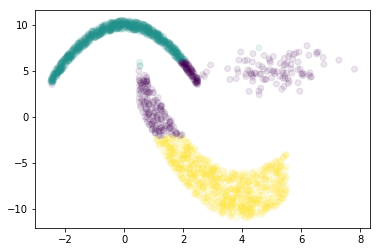

In [30]:
plt.scatter(X[:, 0], X[:, 1], c = y_pred, alpha = 0.1)
plt.scatter(X_test[:, 0], X_test[:, 1], c = pred2, marker = 'x', s = 1000)
plt.title('Cluster classification using Tensorflow for Dataset02')
plt.show()